In [11]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np


In [12]:
# Load the entire model back from the file
model = load_model('lenet5_model.keras')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_images = tf.pad(test_images, [[0, 0], [2, 2], [2, 2]])
test_images = tf.cast(test_images, tf.float32) / 255.0


test_images = 1.0 - test_images # to invert colors

test_images.shape

TensorShape([10000, 32, 32])

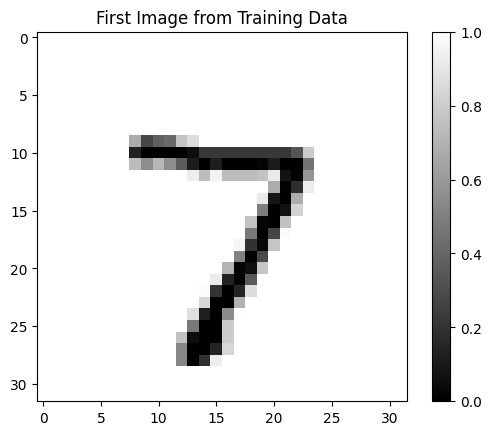

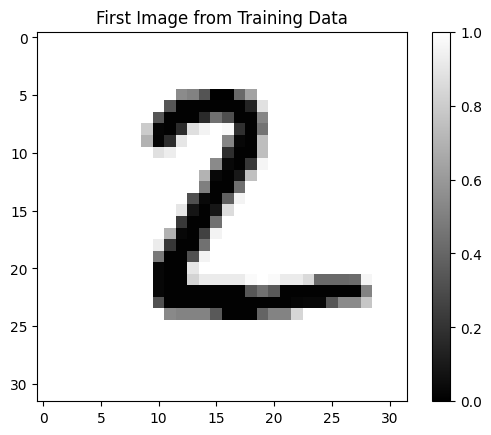

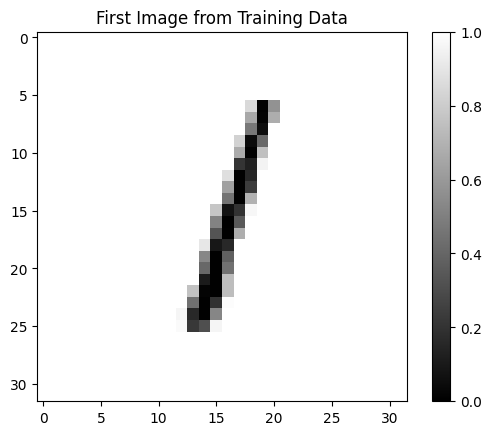

In [14]:
# Plotting the image
plt.imshow(test_images[0, :, :], cmap='gray')  # 'cmap' specifies that we want to see the image in grayscale
plt.title('First Image from Training Data')
plt.colorbar()
plt.show()
plt.imshow(test_images[1, :, :], cmap='gray')  # 'cmap' specifies that we want to see the image in grayscale
plt.title('First Image from Training Data')
plt.colorbar()
plt.show()
plt.imshow(test_images[2, :, :], cmap='gray')  # 'cmap' specifies that we want to see the image in grayscale
plt.title('First Image from Training Data')
plt.colorbar()
plt.show()

In [15]:
test_labels = to_categorical(test_labels, 10)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(32)  # Only batch the test data (no need to shuffle)


In [16]:
predictions = model.predict(test_images) # returns matrix when each column represents confidence
print(test_images.shape)
class_prediction = np.argmax(predictions, axis=1)
print(class_prediction)
correct_prediction = np.argmax(test_labels, axis=1)
print(correct_prediction)

comparison = np.equal(class_prediction,correct_prediction)
true_count = np.sum(comparison)
print(f'Accuracy: {true_count/correct_prediction.shape[0]* 100}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 32, 32)
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
Accuracy: 93.36


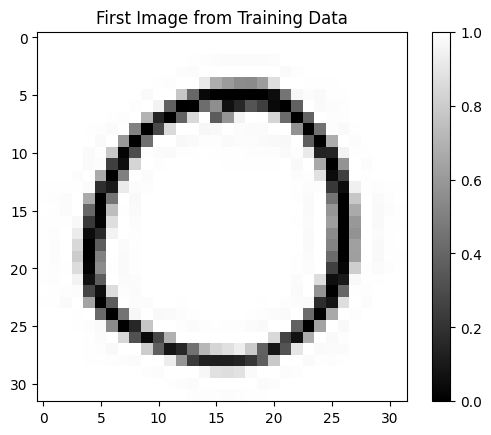

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: [0]


In [18]:
from PIL import Image
import numpy as np

def image_to_32x32_array(filepath):
    with Image.open(filepath) as img:
        img_gray = img.convert('L')
        img_resized = img_gray.resize((32, 32), Image.Resampling.LANCZOS)
        img_array = np.array(img_resized) / 255.0
        img_array = img_array.reshape(1, 32, 32)  # batch dimension, shape.x, shape.y
        return img_array


image_array = image_to_32x32_array('/home/luky/playground/handwriting_recognition/data/5.jpg')
plt.imshow(image_array[0, :, :], cmap='gray')  # 'cmap' specifies that we want to see the image in grayscale
plt.title('First Image from Training Data')
plt.colorbar()
plt.show()
predictions = model.predict(image_array)
class_prediction = np.argmax(predictions, axis=1)
print(f'Predicted class: {class_prediction}')